/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


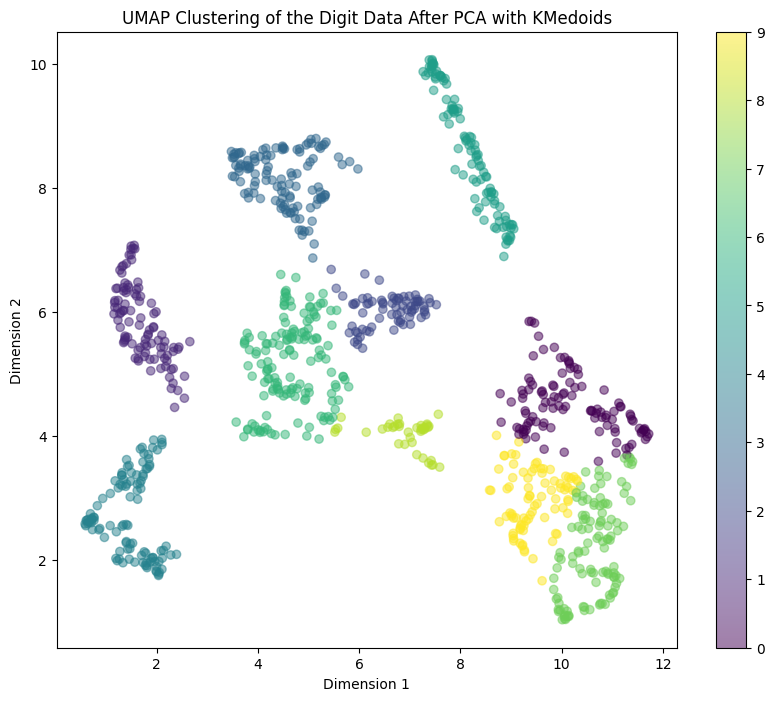

Submission file saved.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn_extra.cluster import KMedoids

data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")
data.drop('ID', axis=1, inplace=True)

thresholded_data = (data <= 0).astype(int)

pca = PCA(n_components=0.75, random_state=42)
pca_data = pca.fit_transform(thresholded_data)
umap_reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
umap_data = umap_reducer.fit_transform(pca_data)
umap_data_df = pd.DataFrame(umap_data, columns=['Dim1', 'Dim2'])

kmedoids = KMedoids(n_clusters=10, init='k-medoids++', metric="euclidean", random_state=42, max_iter=1000)
kmedoids.fit(umap_data_df)
data['Label'] = kmedoids.labels_
plt.figure(figsize=(10, 8))
plt.scatter(umap_data_df['Dim1'], umap_data_df['Dim2'], c=data['Label'], cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('UMAP Clustering of the Digit Data After PCA with KMedoids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

submission = pd.DataFrame({
    'ID': data.index + 1,
    'Label': data['Label']
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved.")